# Chapter 1: Analysis of Economics Data

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch01_visual_summary.jpg" alt="Chapter 01 Visual Summary" width="65%">

This notebook provides an interactive introduction to regression analysis using Python. You can run all code directly in Google Colab without any local setup required. The data streams directly from GitHub, making this notebook fully self-contained.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch01_Analysis_of_Economics_Data.ipynb)

## Learning Objectives

By the end of this chapter, you will be able to:
- Distinguish between descriptive analysis and statistical inference
- Identify different types of data (continuous, discrete, categorical)
- Understand the difference between observational and experimental data
- Recognize the three main data collection methods (cross-section, time series, panel)
- Understand the basic concept of regression analysis
- Navigate the structure and organization of this textbook

---



## Chapter Overview

This chapter introduces the fundamental concepts of econometrics and regression analysis. We'll explore how economists use statistical methods to understand relationships in economic data, focusing on a practical example of house prices and house sizes.

**What you'll learn:**
- What regression analysis is and why it's the primary tool in econometrics
- How to load and explore economic data using Python (pandas)
- How to visualize relationships between variables using scatter plots
- How to fit a simple linear regression model using Ordinary Least Squares (OLS)
- How to interpret regression coefficients in economic terms
- How to use Python's statsmodels package for regression analysis

**Dataset used:**
- **AED_HOUSE.DTA**: House sale prices for 29 houses in Central Davis, California (1999)
  - Variables: price (sale price in dollars), size (house size in square feet), plus 7 other characteristics

**Chapter outline:**
- 1.1 What is Regression Analysis?
- 1.2 Load the Data
- 1.3 Preview the Data
- 1.4 Explore the Data
- 1.5 Visualizing the Relationship
- 1.6 Fitting a Regression Line
- 1.7 Interpreting the Results
- 1.8 Visualizing the Fitted Line
- 1.9 Economic Interpretation and Examples
- 1.10 Practice Exercises

## Setup

Run this cell first to import all required packages and configure the environment. This sets up:
- Data manipulation (pandas, numpy)
- Statistical modeling (statsmodels)
- Visualization (matplotlib)
- Reproducibility (random seeds)

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 1.1 What is Regression Analysis?

**Regression analysis** is the primary tool economists use to understand relationships between variables. At its core, regression answers questions like: "How does Y change when X changes?"

In our example:
- **Y (dependent variable)**: House sale price (in dollars)
- **X (independent variable)**: House size (in square feet)

**The regression line** is the "line of best fit" that minimizes the sum of squared distances between actual prices and predicted prices. The mathematical form is:

$$\text{price} = \beta_0 + \beta_1 \times \text{size} + \varepsilon$$

Where:
- $\beta_0$ = **intercept** (predicted price when size = 0)
- $\beta_1$ = **slope** (change in price for each additional square foot)
- $\varepsilon$ = **error term** (random variation not explained by size)

**Economic Interpretation:**  
The slope coefficient $\beta_1$ tells us: "On average, how much more expensive is a house that is 1 square foot larger?" This is a measure of **association**, not necessarily causation.


> **Key Concept**: Descriptive analysis summarizes data using statistics and visualizations, while statistical inference uses sample data to draw conclusions about the broader population. Most econometric analysis involves statistical inference.



## 1.2 Load the Data

Let's load the house price dataset directly from GitHub. This dataset contains information on 29 house sales in Central Davis, California in 1999.

In [2]:
# Load the Stata dataset from GitHub
data_house = pd.read_stata(GITHUB_DATA_URL + 'AED_HOUSE.DTA')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {data_house.shape[0]} observations, {data_house.shape[1]} variables")

✓ Data loaded successfully!
  Shape: 29 observations, 8 variables


## 1.3 Preview the Data

Let's look at the first few rows to understand what variables we have available.

In [3]:
# Display first 5 rows
print("First 5 observations:")
print(data_house.head())

print("\nColumn names:")
print(data_house.columns.tolist())

First 5 observations:
    price  size  bedrooms  bathrooms  lotsize   age  monthsold    list
0  204000  1400         3        2.0        1  31.0          7  199900
1  212000  1600         3        3.0        2  33.0          5  212000
2  213000  1800         3        2.0        2  51.0          4  219900
3  220000  1600         3        2.0        1  49.0          4  229000
4  224500  2100         4        2.5        2  47.0          6  224500

Column names:
['price', 'size', 'bedrooms', 'bathrooms', 'lotsize', 'age', 'monthsold', 'list']



**Transition:** Before jumping into regression analysis, we need to understand our data. Descriptive statistics reveal the scale, variability, and range of our variables—essential for interpreting regression results.



## 1.4 Explore the Data

Before running any regression, it's essential to understand the data through **descriptive statistics**. Let's look at the key statistics for our variables of interest: price and size.

In [4]:
# Summary statistics for all variables
print("=" * 70)
print("DESCRIPTIVE STATISTICS")
print("=" * 70)
print(data_house.describe().round(2))

# Focus on our key variables
print("\n" + "=" * 70)
print("KEY VARIABLES: PRICE AND SIZE")
print("=" * 70)
print(data_house[['price', 'size']].describe().round(2))

DESCRIPTIVE STATISTICS
           price     size  bedrooms  bathrooms  lotsize    age  monthsold  \
count      29.00    29.00     29.00      29.00    29.00  29.00      29.00   
mean   253910.34  1882.76      3.79       2.21     2.14  36.41       5.97   
std     37390.71   398.27      0.68       0.34     0.69   7.12       1.68   
min    204000.00  1400.00      3.00       2.00     1.00  23.00       3.00   
25%    233000.00  1600.00      3.00       2.00     2.00  31.00       5.00   
50%    244000.00  1800.00      4.00       2.00     2.00  35.00       6.00   
75%    270000.00  2000.00      4.00       2.50     3.00  39.00       7.00   
max    375000.00  3300.00      6.00       3.00     3.00  51.00       8.00   

            list  
count      29.00  
mean   257824.14  
std     40860.26  
min    199900.00  
25%    239000.00  
50%    245000.00  
75%    269000.00  
max    386000.00  

KEY VARIABLES: PRICE AND SIZE
           price     size
count      29.00    29.00
mean   253910.34  1882.76
std

**Key observations:**
- **Mean house price**: Around \$253,910
- **Mean house size**: Around 1,883 square feet
- **Price range**: \$204,000 to \$375,000
- **Size range**: 1,400 to 3,300 square feet

Notice the variation in both variables - this variation is what allows us to estimate a relationship!


> **Key Concept**: Economics primarily uses observational data where we observe behavior in uncontrolled settings. Unlike experimental data where conditions can be controlled, observational data requires careful methods to establish relationships and, when possible, causal effects.



## 1.5 Visualizing the Relationship

**Before running any regression**, it's good practice to visualize the relationship between X and Y. A scatter plot helps us:
1. Check if there appears to be a linear relationship
2. Identify any outliers or unusual observations
3. Get an intuitive sense of the strength of the relationship

Let's create a scatter plot of house price vs. house size.

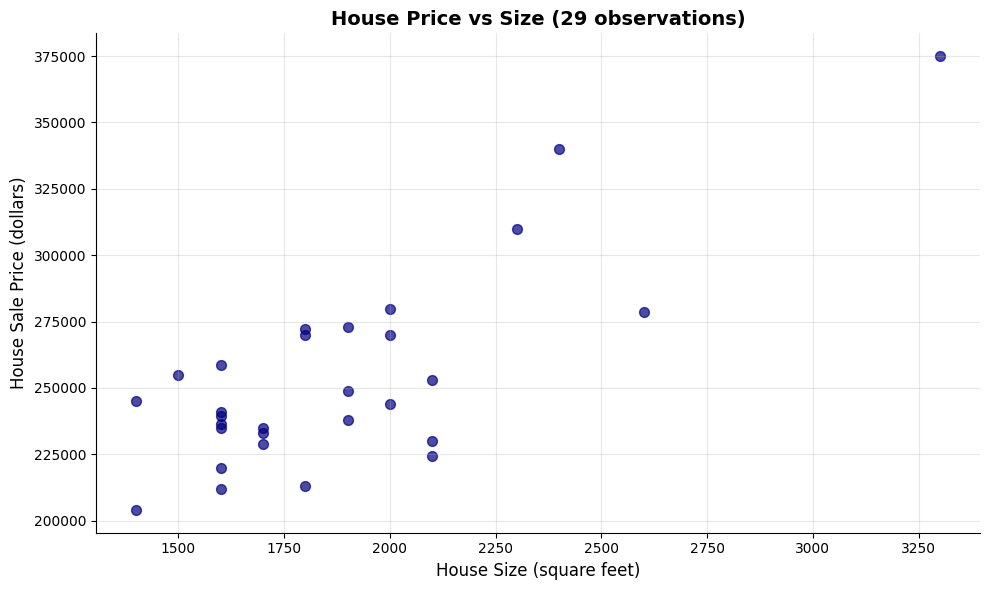


What do you see?
- Positive relationship: Larger houses tend to have higher prices
- Roughly linear: The points follow an upward-sloping pattern
- Some scatter: Not all points lie exactly on a line (this is the 'error')


In [11]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
ax.scatter(data_house['size'], data_house['price'],
           color='navy', s=50, alpha=0.7)

# Labels and formatting
ax.set_xlabel('House Size (square feet)', fontsize=12)
ax.set_ylabel('House Sale Price (dollars)', fontsize=12)
ax.set_title('House Price vs Size (29 observations)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

print("\nWhat do you see?")
print("- Positive relationship: Larger houses tend to have higher prices")
print("- Roughly linear: The points follow an upward-sloping pattern")
print("- Some scatter: Not all points lie exactly on a line (this is the 'error')")


**Transition:** Having visualized a clear positive relationship between house size and price, we're ready to quantify this relationship precisely using regression analysis.



## 1.6 Fitting a Regression Line

Now we'll fit an **Ordinary Least Squares (OLS)** regression line to these data. OLS chooses the intercept ($\beta_0$) and slope ($\beta_1$) that **minimize the sum of squared residuals**:

$$\min_{\beta_0, \beta_1} \sum_{i=1}^{n} (\text{price}_i - \beta_0 - \beta_1 \times \text{size}_i)^2$$

In other words, we're finding the line that makes our prediction errors as small as possible (in a squared sense).

We'll use Python's `statsmodels` package, which provides regression output similar to Stata and R.


> **Key Concept**: Regression analysis quantifies the relationship between variables. In a bivariate regression, the slope coefficient tells us how much the outcome variable ($y$) changes when the explanatory variable ($x$) increases by one unit.



In [6]:
# Fit OLS regression: price ~ size
# The formula syntax is: 'dependent_variable ~ independent_variable'
model = ols('price ~ size', data=data_house).fit()

# Display the full regression output
print("=" * 70)
print("OLS REGRESSION RESULTS: price ~ size")
print("=" * 70)
print(model.summary())

OLS REGRESSION RESULTS: price ~ size
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           4.41e-07
Time:                        10:29:55   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.

## 1.7 Interpreting the Results

The regression output contains a lot of information! Let's break down the most important parts:

### Key Statistics to Focus On:

1. **Coefficients table** (middle section):
   - **Intercept**: The predicted price when size = 0 (often not economically meaningful)
   - **size**: The slope coefficient - our main interest!
   - **std err**: Standard error (measures precision of the estimate)
   - **t**: t-statistic (coefficient / standard error)
   - **P>|t|**: p-value (tests if coefficient is significantly different from zero)

2. **R-squared** (top right section):
   - Proportion of variation in Y explained by X
   - Ranges from 0 to 1 (higher = better fit)

3. **F-statistic** (top right section):
   - Tests overall significance of the regression
   - Low p-value (Prob F-statistic) means the model is statistically significant

Let's extract and interpret the key coefficients.

In [14]:
# Extract key statistics
intercept = model.params['Intercept']
slope     = model.params['size']
r_squared = model.rsquared
n_obs     = int(model.nobs)

print("=" * 70)
print("KEY REGRESSION COEFFICIENTS")
print("=" * 70)
print(f"Intercept (β₀): ${intercept:,.2f}")
print(f"Slope (β₁):  ${slope:,.2f}")
print(f"R-squared: {r_squared:.4f} ({r_squared*100:.2f}%)")
print(f"Number of observations: {n_obs}")

print("\n" + "=" * 70)
print("ECONOMIC INTERPRETATION")
print("=" * 70)
print(f"📌 For every additional square foot of house size,")
print(f"   the sale price increases by approximately ${slope:,.2f}")
print(f"\n📌 The model explains {r_squared*100:.2f}% of the variation in house prices")
print(f"\n📌 The remaining {(1-r_squared)*100:.2f}% is due to other factors not included")
print(f"   (e.g., location, age, condition, neighborhood quality)")

KEY REGRESSION COEFFICIENTS
Intercept (β₀): $115,017.28
Slope (β₁):  $73.77
R-squared: 0.6175 (61.75%)
Number of observations: 29

ECONOMIC INTERPRETATION
📌 For every additional square foot of house size,
   the sale price increases by approximately $73.77

📌 The model explains 61.75% of the variation in house prices

📌 The remaining 38.25% is due to other factors not included
   (e.g., location, age, condition, neighborhood quality)


## 1.8 Visualizing the Fitted Line

The **fitted regression line** represents our model's predictions. For any given house size, the line shows the predicted price according to our equation:

$$\hat{\text{price}} = \beta_0 + \beta_1 \times \text{size}$$

Let's overlay this fitted line on our scatter plot to see how well it captures the relationship.

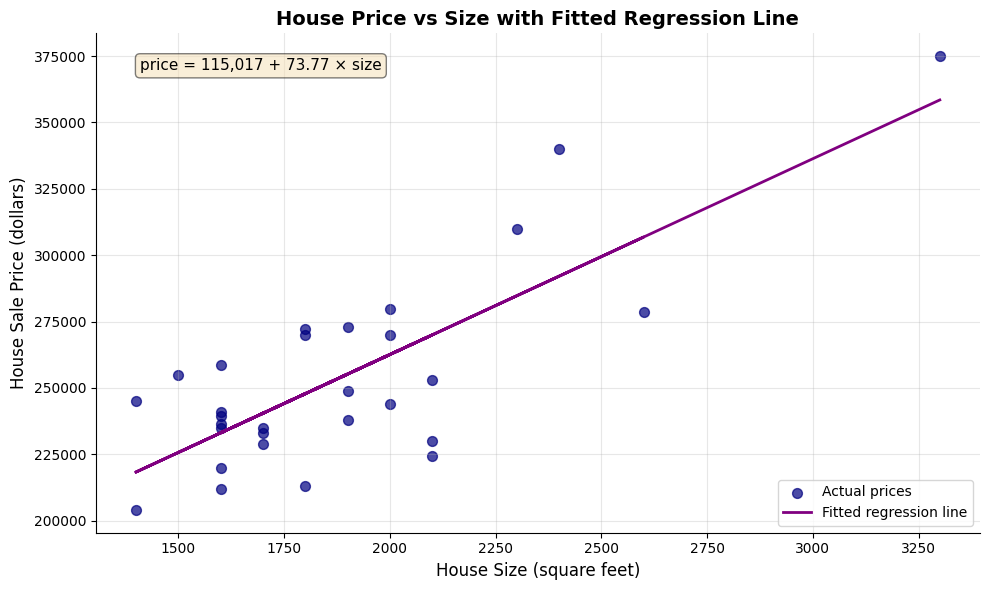


📊 The purple line is our 'line of best fit'
   It minimizes the sum of squared vertical distances from each point


In [16]:
# Create scatter plot with fitted regression line
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual data points
ax.scatter(data_house['size'], data_house['price'],
           color='navy', s=50, label='Actual prices', alpha=0.7)

# Plot fitted regression line
ax.plot(data_house['size'], model.fittedvalues,
        color='purple', linewidth=2, label='Fitted regression line')

# Add equation to plot
equation_text = f'price = {intercept:,.0f} + {slope:.2f} × size'
ax.text(0.05, 0.95, equation_text,
        transform=ax.transAxes, fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Labels and formatting
ax.set_xlabel('House Size (square feet)', fontsize=12)
ax.set_ylabel('House Sale Price (dollars)', fontsize=12)
ax.set_title('House Price vs Size with Fitted Regression Line',
             fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The purple line is our 'line of best fit'")
print("   It minimizes the sum of squared vertical distances from each point")


**Transition:** Statistical output is only meaningful when translated into economic insights. Let's explore what our regression coefficients tell us about housing markets and the limitations of our analysis.



## 1.9 Economic Interpretation and Examples

Now that we've estimated the regression, let's think about what it means in economic terms.

### Practical Implications:

Our estimated slope of approximately **\$74 per square foot** means:
- A house that's 100 sq ft larger is predicted to sell for \$74 × 100 = \$7,400 more
- A house that's 500 sq ft larger is predicted to sell for \$74 × 500 = \$37,000 more

### Making Predictions:

We can use our regression equation to predict prices for houses of different sizes. For example, for a 2,000 sq ft house:

$$\hat{\text{price}} = 115,952 + 74.03 \times 2000 = \$264,012$$

### Important Caveats:

1. **This is association, not causation**: We can't conclude that adding square footage to a house will increase its value by \$74/sq ft. Other factors (like quality of construction) might be correlated with size.

2. **Omitted variables**: Many other factors affect house prices (location, age, condition, amenities). Our simple model ignores these - we'll learn how to include them in later chapters.

3. **Sample-specific**: These results are from 29 houses in Davis, CA in 1999. The relationship might differ in other locations or time periods.

4. **Don't extrapolate too far**: Our data ranges from 1,400 to 3,300 sq ft. Predictions far outside this range (e.g., for a 10,000 sq ft house) may not be reliable.


> **Key Concept**: Regression results must be interpreted with caution. Association does not imply causation, omitted variables can bias estimates, and predictions should not extrapolate beyond the range of the data.



## Key Takeaways

**Statistical Methods and Data Types:**
- Econometrics uses two main approaches: descriptive analysis (summarizing data) and statistical inference (drawing population conclusions from samples)
- Economic data are primarily continuous and numerical, though categorical and discrete data are also important
- Economics relies mainly on observational data, making causal inference more challenging than with experimental data
- The three data collection methods are cross-section (individuals at one time), time series (one individual over time), and panel data (individuals over time)
- Each data type requires different considerations for statistical inference, particularly when computing standard errors
- This textbook focuses on continuous numerical data and cross-section analysis as the foundation for more advanced methods

**Regression Analysis and Interpretation:**
- Regression analysis is the primary tool in econometrics, quantifying how outcome variables (y) vary with explanatory variables (x)
- The simple linear regression model has the form: $y = \beta_0 + \beta_1 x + \varepsilon$, where $\beta_0$ is the intercept and $\beta_1$ is the slope
- The slope coefficient measures association: how much y changes when x increases by one unit
- OLS (Ordinary Least Squares) finds the best-fitting line by minimizing the sum of squared prediction errors
- R-squared measures the proportion of variation in y explained by x, ranging from 0 to 1 (higher = better fit)
- Economic interpretation focuses on magnitude (size of effect), statistical significance, and practical importance

**Practical Application:**
- Our house price example: Each additional square foot is associated with a \$73.77 increase in price (R² = 61.75%)
- Visualization is essential: scatter plots reveal the nature of relationships before fitting regression models
- Regression shows association, not causation—omitted variables and confounding factors require careful consideration
- Predictions should not extrapolate beyond the range of observed data
- Sample-specific results may not generalize to other locations, time periods, or populations

**Python Tools and Workflow:**
- `pandas` handles data loading, manipulation, and descriptive statistics
- `statsmodels.formula.api.ols()` estimates OLS regression models with R-style formula syntax
- `matplotlib` creates publication-quality scatter plots and visualizations
- Standard workflow: load data → explore descriptively → visualize → model → interpret → validate
- Random seeds ensure reproducibility of results across different runs

**Prerequisites and Mathematical Background:**
- Summation notation (Σ) expresses formulas concisely and appears throughout econometrics
- Calculus concepts (derivatives, rates of change) help understand marginal effects but are not essential
- Expected values (E[X]) define population parameters like means and variances
- "Learning-by-doing" is the most effective approach: practice with real data and software is essential for mastery

---

**Next Steps:**
- **Chapter 2**: Univariate data summary (describing single variables)
- **Chapter 3**: The sample mean and sampling distributions
- **Chapter 4**: Statistical inference for the mean (confidence intervals, hypothesis tests)
- **Chapters 5-7**: Deep dive into bivariate regression (extending what we learned here)

**You have now mastered:**
✓ Loading and exploring economic data in Python
✓ Creating scatter plots to visualize relationships
✓ Estimating simple linear regression models with OLS
✓ Interpreting regression coefficients economically
✓ Understanding the limitations of regression analysis

These foundational concepts are the building blocks for all of econometrics. Everything that follows builds on this introduction!


## Practice Exercises

Test your understanding of regression analysis with these exercises:

**Exercise 1:** Conceptual understanding
- (a) What is the difference between descriptive analysis and statistical inference?
- (b) Why do economists primarily use observational data rather than experimental data?
- (c) Name the three main types of data collection methods and give an example of each.

**Exercise 2:** Data types
- Classify each of the following as continuous numerical, discrete numerical, or categorical:
  - (a) Annual household income
  - (b) Number of children in a family
  - (c) Employment status (employed, unemployed, not in labor force)
  - (d) Temperature in degrees Celsius

**Exercise 3:** Regression interpretation
- Suppose you estimate: earnings = 20,000 + 5,000 × education
  - (a) Interpret the intercept coefficient
  - (b) Interpret the slope coefficient
  - (c) Predict earnings for someone with 16 years of education
  - (d) What is the predicted difference in earnings between someone with 12 vs. 16 years of education?

**Exercise 4:** Using our house price model
- Using the regression equation: price = 115,017 + 73.77 × size
  - (a) Predict the price for a 1,800 sq ft house
  - (b) Predict the price for a 2,500 sq ft house
  - (c) What is the predicted price difference between these two houses?
  - (d) Is the intercept economically meaningful in this context? Why or why not?

**Exercise 5:** Critical thinking about causation
- Our regression shows larger houses have higher prices. Does this mean:
  - (a) Adding square footage to a house will increase its value by $73.77 per sq ft?
  - (b) What other factors might be correlated with both house size and price?
  - (c) How would you design a study to establish a causal relationship?

**Exercise 6:** R-squared interpretation
- Our model has R² = 0.6175 (61.75%)
  - (a) What does this number tell us about our model?
  - (b) What factors might explain the remaining 38.25% of variation in prices?
  - (c) Would R² = 1.0 be realistic for real-world economic data? Why or why not?

**Exercise 7:** Summation notation
- Calculate: $\sum_{i=1}^{4} (3 + 2i)$
- Show all steps in your calculation

**Exercise 8:** Python practice
- Load the house dataset and:
  - (a) Calculate the correlation between price and bedrooms
  - (b) Create a scatter plot of price vs. bedrooms
  - (c) Estimate the regression: price ~ bedrooms
  - (d) Compare the R² to our size regression. Which predictor is better?

---

